<a href="https://colab.research.google.com/github/novtryrezki/sarung/blob/main/2FFNN(32)_bs_10_ep_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import os
import zipfile
import random
import shutil
import numpy as np
import tensorflow as tf
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split

In [34]:
# Melakukan mount pada Google Drive
drive.mount('/content/drive')

# Menentukan path file ZIP di Google Drive
zip_path = '/content/drive/MyDrive/images.zip'

# Membuat objek zip_ref
zip_ref = zipfile.ZipFile(zip_path, 'r')

# Mengekstrak file ZIP
extract_path ='/content/images'
zip_ref.extractall(extract_path)

# Tutup objek zip_ref setelah selesai
zip_ref.close()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# Mendefinisikan path direktori dataset
dataset_dir = os.path.join(extract_path, 'images')
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')
list_train = sorted(os.listdir(train_dir))
list_test = sorted(os.listdir(test_dir))

print("Daftar Angka pada Dataset Train yaitu : ", list_train)
print("Daftar Angka pada Dataset Test yaitu : ", list_test)

Daftar Angka pada Dataset Train yaitu :  ['angka 0', 'angka 1', 'angka 2', 'angka 3', 'angka 4', 'angka 5', 'angka 6', 'angka 7', 'angka 8', 'angka 9']
Daftar Angka pada Dataset Test yaitu :  ['angka 0', 'angka 1', 'angka 2', 'angka 3', 'angka 4', 'angka 5', 'angka 6', 'angka 7', 'angka 8', 'angka 9']


In [36]:
def count_images(directory):
    return sum(1 for file in os.listdir(directory) if file.endswith(('.jpg', '.jpeg', '.png', '.gif')))

# Menghitung jumlah gambar di data train
train_image_count = sum(count_images(os.path.join(train_dir, angka)) for angka in list_train)

# Menghitung jumlah gambar di data test
test_image_count = sum(count_images(os.path.join(test_dir, angka)) for angka in list_test)

print(f"Jumlah gambar di Dataset Train: {train_image_count}")
print(f"Jumlah gambar di Dataset Test: {test_image_count}")

Jumlah gambar di Dataset Train: 1763
Jumlah gambar di Dataset Test: 445


# Preprocessing

In [37]:
import cv2

def resize_images(directory, target_resolution):
    for angka in os.listdir(directory):
        angka_dir = os.path.join(directory, angka)
        for file_name in os.listdir(angka_dir):
            file_path = os.path.join(angka_dir, file_name)
            img = cv2.imread(file_path)
            resized_img = cv2.resize(img, (target_resolution, target_resolution))
            cv2.imwrite(file_path, resized_img)

target_resolution = 32
resize_images(train_dir, target_resolution)
resize_images(test_dir, target_resolution)

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Membuat generator data dengan augmentasi
image_size = (32, 32)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 90,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

Found 1763 images belonging to 10 classes.
Found 445 images belonging to 10 classes.


# Membuat Model FFNN

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import math

img_size = 32*32*1

# Perhitungan jumlah neuron pada lapisan tersembunyi
r1 = (img_size/10) ** (1/2)
r2 = (img_size/10) ** (1/3)

hidden_neurons1 = 10 * r1**(2)
hidden_neurons2 = 10 * r2**(1)

model2f = Sequential()
model2f.add(Flatten(input_shape=(32, 32, 1)))
model2f.add(Dense(hidden_neurons1, activation='relu'))
model2f.add(Dense(hidden_neurons2, activation='relu'))
model2f.add(Dense(10, activation='softmax'))

model2f.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
model2f.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 46)                47150     
                                                                 
 dense_5 (Dense)             (None, 10)                470       
                                                                 
Total params: 1097220 (4.19 MB)
Trainable params: 1097220 (4.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
history = model2f.fit(train_generator, epochs=50, verbose = 1)

Epoch 1/50
56/56 [==============================] - 2s 33ms/step - loss: 2.0589 - accuracy: 0.2830
Epoch 2/50
56/56 [==============================] - 2s 31ms/step - loss: 1.9997 - accuracy: 0.3284
Epoch 3/50
56/56 [==============================] - 2s 31ms/step - loss: 1.9810 - accuracy: 0.3483
Epoch 4/50
56/56 [==============================] - 2s 32ms/step - loss: 1.9633 - accuracy: 0.3500
Epoch 5/50
56/56 [==============================] - 3s 46ms/step - loss: 1.9518 - accuracy: 0.3590
Epoch 6/50
56/56 [==============================] - 2s 31ms/step - loss: 1.9437 - accuracy: 0.3545
Epoch 7/50
56/56 [==============================] - 2s 30ms/step - loss: 1.9366 - accuracy: 0.3551
Epoch 8/50
56/56 [==============================] - 2s 31ms/step - loss: 1.9221 - accuracy: 0.3522
Epoch 9/50
56/56 [==============================] - 2s 30ms/step - loss: 1.8988 - accuracy: 0.3727
Epoch 10/50
56/56 [==============================] - 3s 46ms/step - loss: 1.9055 - accuracy: 0.3585
Epoch 11/

#Matriks Konfusi

14/14 [==============================] - 0s 15ms/step


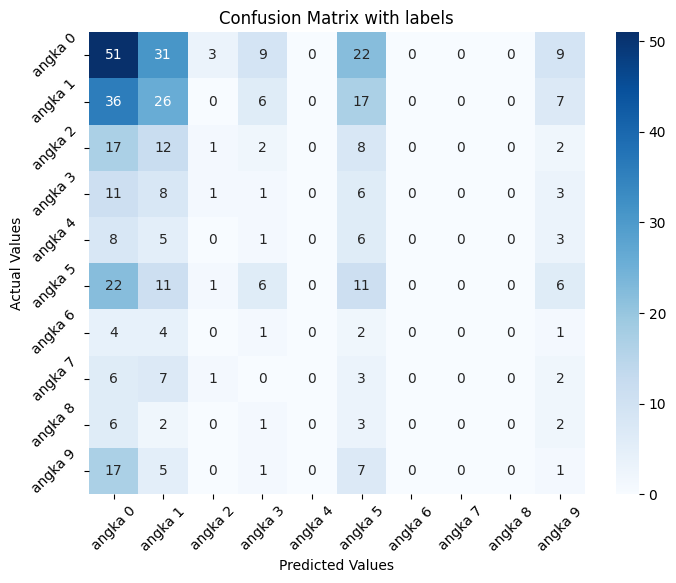

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk mendapatkan prediksi model dan label sebenarnya
def get_predictions_and_labels(model, data_generator):
    predictions = model.predict(data_generator)
    true_classes = data_generator.classes
    return predictions, true_classes

# Mendapatkan prediksi dan label sebenarnya untuk data uji
y_pred_prob, y_true = get_predictions_and_labels(model2f, test_generator)

# Membuat matriks konfusi
cf_matrix = confusion_matrix(y_true, y_pred)

# Membuat visualisasi matriks konfusi
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)

# Menetapkan label dan judul
ax.set_title('Confusion Matrix with labels')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

# Menetapkan label pada sumbu x dan y sesuai dengan jenis kelas
ax.xaxis.set_ticklabels(class_labels, rotation=45)
ax.yaxis.set_ticklabels(class_labels, rotation=45)

# Menampilkan visualisasi Matriks Konfusi
plt.show()

In [43]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

y_pred = np.argmax(y_pred_prob, axis=1)

auc_roc_score = roc_auc_score(y_true, y_pred_prob, multi_class='ovr')
print(f"AUC ROC Score: {auc_roc_score}")
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

AUC ROC Score: 0.5297333843034584
Accuracy: 0.24719101123595505
